In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn import preprocessing, svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

!pip install xgboost
from xgboost import XGBRegressor

!pip install geopy
from geopy.distance import geodesic
import geopy.distance

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train['Distance_km'] = train.apply(lambda x: geopy.distance.distance((x['Restaurant_latitude'], x['Restaurant_longitude']), (x['Delivery_location_latitude'], x['Delivery_location_longitude'])).km, axis=1)
test['Distance_km'] = test.apply(lambda x: geopy.distance.distance((x['Restaurant_latitude'], x['Restaurant_longitude']), (x['Delivery_location_latitude'], x['Delivery_location_longitude'])).km, axis=1)

In [4]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3.020737
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20.143737
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1.549693
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7.774497
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6.197898


In [5]:
test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance_km
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,6.219648
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,17.042985
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,13.390474
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,13.397932
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,17.042634


In [6]:
train['Weatherconditions'] = train['Weatherconditions'].map(lambda x: str(x)[11:])
test['Weatherconditions'] = test['Weatherconditions'].map(lambda x: str(x)[11:])

train['Time_taken(min)'] = train['Time_taken(min)'].map(lambda x: str(x)[6:])

In [7]:
for i in train.columns:
    train[i].loc[train[i] == 'NaN '] = np.nan
    train[i].loc[train[i] == 'NaN'] = np.nan
    train[i].loc[train[i] == 'nan'] = np.nan

for j in test.columns:
    test[j].loc[test[j] == 'NaN '] = np.nan
    test[j].loc[test[j] == 'NaN'] = np.nan
    test[i].loc[test[i] == 'nan'] = np.nan

/var/folders/x1/k6x2x2c9677_n0slz_pq1p5r0000gn/T/ipykernel_26761/1211553291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i].loc[train[i] == 'NaN '] = np.nan
/var/folders/x1/k6x2x2c9677_n0slz_pq1p5r0000gn/T/ipykernel_26761/1211553291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i].loc[train[i] == 'NaN'] = np.nan
/var/folders/x1/k6x2x2c9677_n0slz_pq1p5r0000gn/T/ipykernel_26761/1211553291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [8]:
train['Time_Orderd'].isnull().sum()

1731

In [9]:
train.dropna(subset=['Time_Orderd'], axis=0, inplace=True)
test.dropna(subset=['Time_Orderd'], axis=0, inplace=True)

train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [10]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2.0,Snack,motorcycle,0,No,Urban,24,3.020737
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2.0,Snack,scooter,1,No,Metropolitian,33,20.143737
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0.0,Drinks,motorcycle,1,No,Urban,26,1.549693
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,21,7.774497
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1.0,Snack,scooter,1,No,Metropolitian,30,6.197898


In [11]:
test.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Distance_km
count,10955.000000,10955.000000,10955.000000,10955.000000,10955.000000,10955.000000
mean,17.355682,71.070443,17.575249,71.134088,1.007029,26.966742
std,7.643640,20.633911,7.280599,20.634775,0.817602,306.259416
min,-30.902872,0.000000,0.010000,0.010000,0.000000,1.463837
25%,12.934179,73.749285,12.992532,73.780087,0.000000,4.654167
50%,18.554382,75.898497,18.642718,75.996959,1.000000,9.204106
75%,22.744648,78.046106,22.791413,78.104468,2.000000,13.660855
max,30.914057,88.433452,31.054057,88.563452,2.000000,6852.617172


In [12]:
train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,Distance_km
count,43862.000000,43862.000000,43862.000000,43862.000000,43862.000000,43862.000000
mean,17.241971,70.764932,17.462466,70.828527,1.000889,27.066398
std,7.698686,21.136195,7.338540,21.136365,0.816557,301.574581
min,-30.902872,0.000000,0.010000,0.010000,0.000000,1.463837
25%,12.933298,73.170283,12.986229,73.279312,0.000000,4.654125
50%,18.554382,75.898497,18.633934,75.999490,1.000000,9.204106
75%,22.732225,78.045359,22.785049,78.104095,2.000000,13.660855
max,30.914057,88.433452,31.054057,88.563452,2.000000,6852.617172


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43862 non-null  object 
 1   Delivery_person_ID           43862 non-null  object 
 2   Delivery_person_Age          43862 non-null  object 
 3   Delivery_person_Ratings      43862 non-null  object 
 4   Restaurant_latitude          43862 non-null  float64
 5   Restaurant_longitude         43862 non-null  float64
 6   Delivery_location_latitude   43862 non-null  float64
 7   Delivery_location_longitude  43862 non-null  float64
 8   Order_Date                   43862 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            43862 non-null  object 
 11  Weatherconditions            43862 non-null  object 
 12  Road_traffic_density         43862 non-null  object 
 13  Vehicle_conditio

In [14]:
train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
Distance_km                    0
dtype: int64

In [15]:
test.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Distance_km                    0
dtype: int64

In [16]:
test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance_km
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,Windy,Jam,0.0,Snack,motorcycle,1,No,Metropolitian,17.042985
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,Stormy,Jam,0.0,Drinks,motorcycle,1,No,Metropolitian,13.390474
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,Fog,Medium,1.0,Meal,scooter,1,No,Metropolitian,13.397932
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,Sunny,Medium,2.0,Drinks,scooter,1,No,Metropolitian,17.042634
5,0xc4af,GOARES04DEL01,26,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,09:45:00,09:55:00,Fog,Low,0.0,Drinks,motorcycle,1,No,Metropolitian,1.541060


In [17]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2.0,Snack,motorcycle,0,No,Urban,24,3.020737
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2.0,Snack,scooter,1,No,Metropolitian,33,20.143737
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0.0,Drinks,motorcycle,1,No,Urban,26,1.549693
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,21,7.774497
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1.0,Snack,scooter,1,No,Metropolitian,30,6.197898


In [18]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken(min)']
features1 =  ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']
for i in features:
    train[i] = train[i].astype(str).astype(float)
    for j in features1:
        test[j] = test[j].astype(str).astype(float)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43862 non-null  object 
 1   Delivery_person_ID           43862 non-null  object 
 2   Delivery_person_Age          43862 non-null  float64
 3   Delivery_person_Ratings      43862 non-null  float64
 4   Restaurant_latitude          43862 non-null  float64
 5   Restaurant_longitude         43862 non-null  float64
 6   Delivery_location_latitude   43862 non-null  float64
 7   Delivery_location_longitude  43862 non-null  float64
 8   Order_Date                   43862 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            43862 non-null  object 
 11  Weatherconditions            43862 non-null  object 
 12  Road_traffic_density         43862 non-null  object 
 13  Vehicle_conditio

In [20]:
train['Order_Time'] = train['Order_Date'] + str(' ') + train['Time_Orderd']
train['Picked_Up_Time'] = train['Order_Date'] + str(' ') + train['Time_Order_picked']

test['Order_Time'] = test['Order_Date'] + str(' ') + test['Time_Orderd']
test['Picked_Up_Time'] = test['Order_Date'] + str(' ') + test['Time_Order_picked']

train['Order_Time'] = pd.to_datetime(train['Order_Time'])
train['Picked_Up_Time'] = pd.to_datetime(train['Picked_Up_Time'])

test['Order_Time'] = pd.to_datetime(test['Order_Time'])
test['Picked_Up_Time'] = pd.to_datetime(test['Picked_Up_Time'])

In [21]:
train['Time_Order_picked'] = ((train['Picked_Up_Time'] - train['Order_Time'])/pd.Timedelta(1, 'min')).fillna(0).astype(int)
test['Time_Order_picked'] = ((test['Picked_Up_Time'] - test['Order_Time'])/pd.Timedelta(1, 'min')).fillna(0).astype(int)

In [22]:
train['Time_Order_picked'].value_counts()

 5       14564
 10      14288
 15      14179
-1425      431
-1430      261
-1435      139
Name: Time_Order_picked, dtype: int64

In [23]:
test['Time_Order_picked'].value_counts()

 10      3591
 15      3587
 5       3575
-1425     103
-1430      62
-1435      37
Name: Time_Order_picked, dtype: int64

In [24]:
train['Time_Order_picked'].replace([-1425, -1430, -1435], [15, 10, 5], inplace=True)
test['Time_Order_picked'].replace([-1425, -1430, -1435], [15, 10, 5], inplace=True)

In [25]:
train['Time_Order_picked'].value_counts()

5     14703
15    14610
10    14549
Name: Time_Order_picked, dtype: int64

In [26]:
test['Time_Order_picked'].value_counts()

15    3690
10    3653
5     3612
Name: Time_Order_picked, dtype: int64

In [27]:
ID = test.ID

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           43862 non-null  object        
 1   Delivery_person_ID           43862 non-null  object        
 2   Delivery_person_Age          43862 non-null  float64       
 3   Delivery_person_Ratings      43862 non-null  float64       
 4   Restaurant_latitude          43862 non-null  float64       
 5   Restaurant_longitude         43862 non-null  float64       
 6   Delivery_location_latitude   43862 non-null  float64       
 7   Delivery_location_longitude  43862 non-null  float64       
 8   Order_Date                   43862 non-null  object        
 9   Time_Orderd                  43862 non-null  object        
 10  Time_Order_picked            43862 non-null  int64         
 11  Weatherconditions            43862 non-nu

In [29]:
train.shape

(43862, 23)

In [30]:
test.shape

(10955, 22)

In [31]:
train.drop(['ID','Delivery_person_ID', 'Vehicle_condition', 'Type_of_order'], axis=1, inplace=True)
test.drop(['ID','Delivery_person_ID', 'Vehicle_condition', 'Type_of_order'], axis=1, inplace=True)

In [32]:
train.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
            'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Order_Time', 'Picked_Up_Time'], axis=1, inplace=True)
test.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
            'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Order_Time', 'Picked_Up_Time'], axis=1, inplace=True)

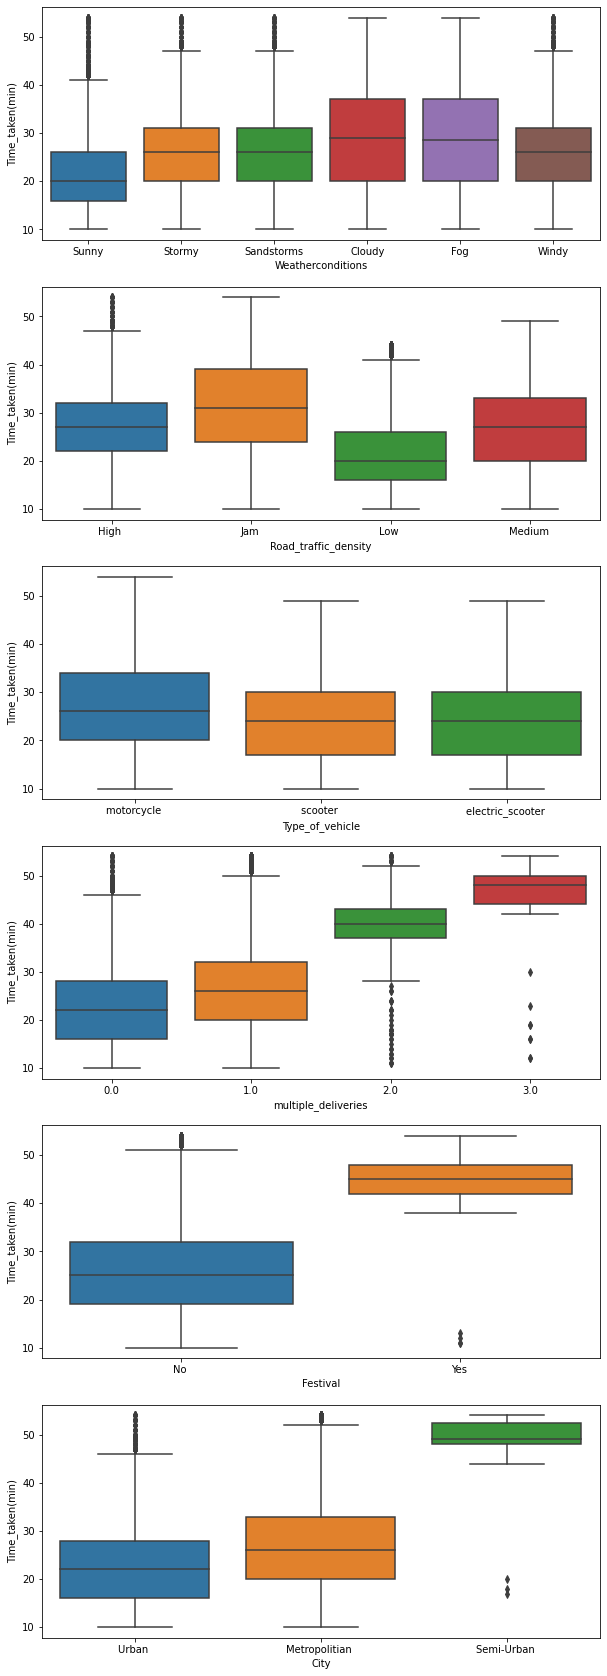

In [33]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(10,30))
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=train, ax=ax1)
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=train, ax=ax2)
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=train, ax=ax3)
sns.boxplot(x='multiple_deliveries', y='Time_taken(min)', data=train, ax=ax4)
sns.boxplot(x='Festival', y='Time_taken(min)', data=train, ax=ax5)
sns.boxplot(x='City', y='Time_taken(min)', data=train, ax=ax6)
plt.show()

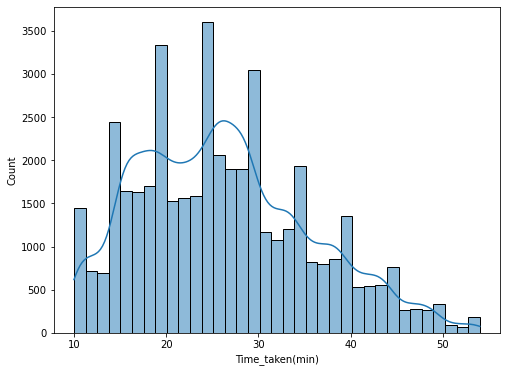

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(train, x='Time_taken(min)', bins=35, kde=True)
plt.show()

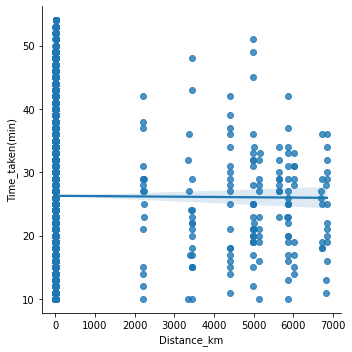

In [35]:
sns.lmplot(data=train, x='Distance_km', y='Time_taken(min)')
plt.show()

In [36]:
X = train.drop('Time_taken(min)', axis=1)
y = train['Time_taken(min)']

In [37]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [38]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,multiple_deliveries,Distance_km,Weatherconditions_Cloudy,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,...,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban
0,37.0,4.9,0.0,3.020737,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,34.0,4.5,1.0,20.143737,0,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
2,23.0,4.4,1.0,1.549693,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,38.0,4.7,1.0,7.774497,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
4,32.0,4.6,1.0,6.197898,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [40]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))
print('R-Squared:', metrics.r2_score(y_test, lin_pred))

Mean Absolute Error: 0.044591717562226296
Mean Squared Error: 0.02113305424693028
Root Mean Squared Error: 0.14537212334877098
R-Squared: 0.021389304824339917


In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [43]:
print("Accuracy:", metrics.accuracy_score(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print('R-Squared:', metrics.r2_score(y_test, knn_pred))

Accuracy: 0.004833120554441
Root Mean Squared Error: 0.15159863732138348
R-Squared: -0.05022433040104393


In [44]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [45]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('R-Squared:', metrics.r2_score(y_test, rfr_pred))

Root Mean Squared Error: 0.15028156528536282
R-Squared: -0.04635969968657615


In [46]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [47]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('R-Squared:', metrics.r2_score(y_test, xgb_pred))

Root Mean Squared Error: 0.14904654
R-Squared: -0.06903199681413394
